# Calculadora de retención, simplificando la retención para instituciones académicas

## Autor : Eric Ríos Soderman 

## Descripción del objetivo 

#### Saludos, el propósito de este proyecto es atender la necesidad de poder calcular la retención de varios cohortes en una franja de tiempo mucha más pequeña. El reto más grande siempre ha sido tiempo y recurso. Este tipo de reporte, para al menos 7 a 8 cohortes, se estima entre dos semanas a un mes. El otro reto es recurso, debido a que usualmente este reporte es hecho por una persona con poca o ninguna asistencia, cuando claramente la puede necesitar. Para refrescarles la terminología, un cohorte es un grupo de estudiantes identificados por algún rasgo como, por ejemplo, el año de ingreso. La retención del mismo es la suma de los estudiantes matriculados en el próximo semestre y los graduados y luego dividiendo esa cantidad entre el denominador original del grupo.  


## Solución e instrucciones

#### Diseñé una herramienta que se dedica a este reto. La misma calcula la retención de uno o múltiples cohortes con la data de matrícula y graduación que supla el usuario. La meta de esta herramienta es ayudar a un usuario común a generar las cifras de retención de sus cohortes en cuestión de pocas horas, no días y semanas. . Este documento es la versión de usuario y está destinado a facilitarles el proceso lo más posible. Además, está particularmente dirigido a usuarios sin conocimiento de Microsoft Excel, Access y Programación. Antes de explicar las instrucciones generales, quiero enfatizar que tengan su archivo de cohorte(s), sus archivos de matrículas (varios semestres) y su archivo de graduación general (1 archivo) accesibles. Otro detalle que quiero añadir es que todos los componentes de esta herramienta presume que sus archivos traen encabezados en la primera fila. Además, si no lo ha hecho todavía, descargue y desempaque WinPython ([Aquí](https://sourceforge.net/projects/winpython/files/) o [Acá](https://github.com/winpython/winpython/releases/tag/3.0.20200808))  para obtener Jupyter Notebook o simplemente instale Jupyter Notebook vía otro método. Por último quiero destacar que este herramienta o libreto es destinada para instituciones académicas y es gratis para descargar y utilizar para todos y todas en todo el sentido de la palabra. 

#### Instrucciones generales:

* Siga todas las instrucciones de cada celda al pie de la letra. 
* Los comandos que dejé hechos sirven de guía y ejemplo para todos los pasos a seguir.
* Usted insertará nombres y pequeños códigos de sus archivos académicos a través de todo el documento. 
* Para correr o ejecutar los comandos de una celda, puede pulsa "shift" y luego "enter" o simplemente el botón de "run".
* Si cometió un error en alguna celda, edite el código erróneo, regresé al principio del documento y corra todas las celdas (desde la primera).
* La función de "undo" existe en esta herramienta, ctrl + z.
* Hay celdas que se corren sin editar o tocar en cualquier carácter. Se denominan como "#Correr Celda".
* Habrán ejemplos para guiarle en todo momento.
* Los ejemplos e instrucciones que redacté comienzan con este símbolo "#".
* Habrán explicaciones breves de qué hace cada celda. 
* Reitero que la herramienta presume que todos los archivos suplidos por usuarios traen encabezados o títulos para columnas.
* La herramienta genera copias de sus archivos sometidos y nunca alterará sus originales.


## Fase 1: Suplan el archivo del cohorte(s)

#### En primer lugar, deben suplir archivos. Van a necesitar salvarlos como formato CSV. Si están utilizando excel, pulsen "Save as" y luego marquen el formato y luego salvénlos.  Ese es el primer paso.

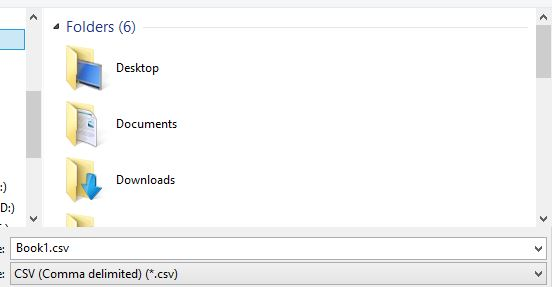

#### Luego subánlos todos a su Jupyter Notebook o vínculenlos. Procederé a explicar los dos métodos. El primero es más fácil, se suben los archivos al libreto y luego la herramienta los busca cuando un comando lo solicite. El segundo método requiere el camino o destino del archivo cuando se corra un comando. Este segundo método se explicará también en los próximos pasos de este documento. Compartiré una foto del primer método.

#### Right Click o pulsar botón derecho de ratón a la insignia de la herramienta. Abánla en otra pestaña.

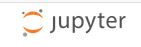

#### Se supone que caigan en una pestaña similar a esta. Los cartapacios e items que ustedes vean en esta imagen no son relevantes. Lo importantes es que puedan ver este menu. Lo próximo que harán es marcar "Upload". Una vez identifiquen el archivo, subánlo y opriman el botón azulado "upload". De ahora en adelante, cuando necesite adjuntar un archivo, simplemente escribirá el nombre del mismo en comillas como "Archivo.csv". Consejo: Traten de subirlo después de abrir el "Home Page". No almacenen esos archivos en sub-cartapacios específicos.

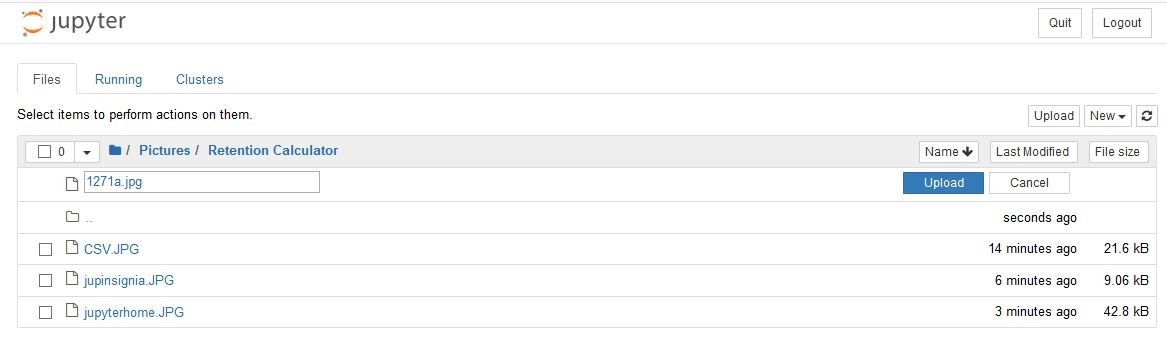

#### El segundo método es el destino. Por ejemplo, si su archivo yace en el Desktop, puede ser algo como 'C:\User\Desktop/Archivo.csv'. Sin embaro, cuando lo inserten en un código, será de la siguiente forma: r'C:\User\Desktop\Archivo.csv'. El destino se obtiene con las propiedades del archivo. 

## Fase 2: La herramienta transforma su archivo en un formato manipulable

In [78]:
#Correr celda. No alterar su contenido.

def csv_to_list_opener(dataset_csv):
    opened_file = open(dataset_csv)
    from csv import reader
    read_file = reader(opened_file)
    list_mode = list(read_file)
    return list_mode

def give_me_a_look (file):
    
    for row in file[:11]:
        print(row)
        print('\n')
        
    print('Headcount: ',len(file[1:]))
    
class CohortCenter ():
    
    def __init__ (self, cohort_list_form, number_of_cohort_identifier_column, number_of_student_id_column):
        
        self.start = len(cohort_list_form[0])
        
        self.cohort_identifier = number_of_cohort_identifier_column - 1 
        
        self.sid_column_index = number_of_student_id_column - 1 
       

### Primer comando : Transformar el cohorte

#### Ahora comienza la herramienta a trabajar. El formato del código es el siguiente:

#### nombre_de_cohorte (utilizar este símbolo "_" entremedio de cada palabra) = csv_to_list_opener(Suarchivo.csv)


### 1. En mi ejemplo fue el siguiente : 

#### test_cohort = csv_to_list_opener('Cohort2012.csv') - Método 1, con todo subido a la libreta



### 2. Otro ejemplo con este comando :

#### Cohorte_2030 = csv_to_list_opener(r'C:\User\Desktop\Coh2030.csv') - Método 2

#### Siempre se encapsulan los nombres de sus archivos en comillas, no obstante el método.



In [79]:
#Modifiquen este código aquí. El nombre completo del csv del cohorte va dentro del paréntesis. 
#Pueden modificar el nombre del cohorte si desean. De ser así, en donde aparezca el nombre "test_cohort", tendrían que 
#cambiarlo cada vez. Si escribe dicho nombre mal, la aplicación reportará un error.

test_cohort = csv_to_list_opener('Cohort2012.csv')

In [80]:
#Para mirar su archivo en la plataforma. Ejecuten este paso porque los ayudará para lo próximo.
#Poner el nombre de cohorte dentro de ese paréntesis si usted lo cambió.
#El comando siempre mostrará los primeros 10 récords; descuide, la cantidad de récords aparece adyacente al 'headcount'.

give_me_a_look (test_cohort)

['Example Student ID', 'Cohort_Yr']


['1', '2012']


['2', '2012']


['3', '2012']


['4', '2012']


['5', '2012']


['6', '2012']


['7', '2012']


['8', '2012']


['9', '2012']


['10', '2012']


Headcount:  100


### Segundo comando:

#### Usted ya ha pasado la primera parte y presumo que exitosamente pudo observar los miembros de su cohorte. El próximo comando que correrá es CohortCenter.

#### CohortCenter (nombre_del_cohorte, número_de_columna_identificación_de_cohorte, número_de_columna_identificación_de_estudiante)

#### nombre_del_cohorte - Es el nombre que usted puso. En mi caso, fue "test_cohort". 

#### identificación_de_cohorte - Muchas veces los cohortes se identifican con un nombre o número en una columna. Por ejemplo, puede ser el cohorte "2012" o cohorte "MSI". Si usted tiene una columna que identifica su cohorte con este tipo de etiqueta, favor poner el nombre de la columna aquí. OJO: Esta etiqueta es clave si usted quiere evaluar la retención de múltiples cohortes. De no tener este tipo de columna y estar evaluando un cohorte solamente, ponga el número '0'. Si tiene la columna, ponga el número de esa columna de todas maneras.

#### identificación_de_estudiante - Todos los estudiantes tienen un número o código de identificación. Puede ser hasta su nombre. Favor poner el número de la columna en donde se encuentra los números de identificación de los estudiantes. 

### Un ejemplo de mi archivo de cohorte:

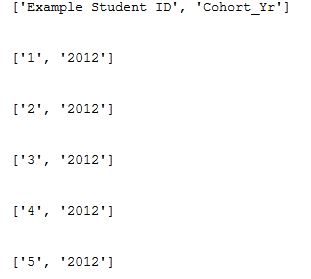

#### La columna de cohorte en mi archivo es la segunda. La columna del número de estudiante es la primera. Además, cada columna tiene su título y su encabezado. Por último el nombre de mi cohorte es "test_cohort". Por esa razón el comando mío fue:

#### CohortCenter (test_cohort,2,1)

In [81]:
#Lo único que usted modificará en esta celda es solamente el contenido dentro del paréntesis de CohortCenter()
#El primer argumento es el nombre del cohorte; el segundo y tercero son números solamente de las columnas especificadas.

retention_marker = CohortCenter (test_cohort,2,1)

retention_start_point = retention_marker.start 

cohort_point = retention_marker.cohort_identifier

sid_point = retention_marker.sid_column_index

### ¿Qué ha pasado?

#### Usted tiene su cohorte grabado en la herramienta en un fórmato ideal y la herramienta ahora conoce las columnas claves del cohorte grabado. 

## Fase 3 : Suplan los archivos de matrícula solamente

### Presumiendo que hayan subido sus archivos vía el método 1 o disponibles vía el método 2, ahora van a adjuntar información de matrícula después de correr la próxima celda. Quiero adelantarles que pueden adjuntar cuantos semestres o términos deseen. No hay límite. 

In [82]:
#Correr celda. No tocar el contenido.

def semester_attacher(dataset_csv_with_header, semester_name_assigned_by_user, student_id_column_in_enrollment_data,
                      your_cohort_file, student_id_column_in_your_cohort = sid_point):
    
    semester_data = csv_to_list_opener(dataset_csv_with_header)
    
    your_cohort_file[0].append(semester_name_assigned_by_user) # The user names the semester to be attached
    
    semester_data_no_header = semester_data[1:] 
    
    new_semester_data_with_id_only = [] #Isolate all student ids to make a search easier
    
    student_index = 1 # The index of the first student record in the cohort data will be 1, 0 being the header
    
    
    for row in semester_data_no_header:
        
        student_id_enrollment = row[student_id_column_in_enrollment_data - 1] #SID location in semester file
        
        new_semester_data_with_id_only.append(student_id_enrollment)
            
    
    for row in your_cohort_file[1:]:
    
        
        student_id = row[student_id_column_in_your_cohort] # sid_point from the CohortCenter instantiation
        result = 0 
        
        for i, element in enumerate(new_semester_data_with_id_only):
            if element == student_id:
                result+=1
            
        if result>=1: #Helps to deal with enrollment files containing duplicates
            your_cohort_file[student_index].append(1) 
            
        elif result<=0:
             your_cohort_file[student_index].append(0)
                
        student_index+=1 # If someone enrolled, a '1' is appended to the cohort record thanks to the student_index
                         #Then a student_index increases in increments of 1.

### Tercer comando

#### semester_attacher(nombre_de_archivo_de_ matrícula, nombre_de_semestre, número_de_columna_matrícula_identificacón_de_estudiante, nombre_de_cohorte) 

### Explicaciones de argumentos en el comando:

#### nombre_de_archivo_de_ matrícula - Es el nombre del archivo de matrícula que usted vaya a utilizar. Importante, se corre un comando por semestre. Si son 12 semestres o términos, son 12 comandos. Se encapsula el nombre de este archivo en comillas. 

#### nombre_de_semestre - Este es el nombre de término que el usuario le pone a su archivo de matrícula. Por ejemplo, yo comencé mi estudio con mis archivos ficticios en el 2012. El primer término decidí etiquetarlo como '12-A'. Usted le puede poner cualquier nombre. Además, preste atención especial y apunte el nombre que usted escoga en otro papel o documento. Lo necesitará para una de los comandos siguientes. Añado que el nombre del semestre se encapsula en comillas.

#### número_de_columna_matrícula_identificacón_de_estudiante - A diferencia del comando anterior, se necesita que usted identifiqué la posición o número de la columna en donde yace el código de identificación del estudiante en el archivo de matrícula que usted suple. Ejemplo: ¿Es la cuarta columna en el archivo? El número que usted instertará en el código es el 4.

#### nombre_de_cohorte - Es el nombre que usted puso para su cohorte. En mi caso, fue 'test_cohort'.


In [83]:
#Solamente modificará el contenido dentro del paréntesis.
#Correr un comando por semestre o término académico.
#Si necesita más comandos, haga "copy,paste" y nuevamente modifica el contenido dentro del paréntesis.
#De no necesitar utilizar los cuatro comandos disponibles aquí, borre el que no necesite. No habrá problema. 
#Recuerde apuntar el nombre que le otorgue a su término. 


semester_attacher('Cohort2012 - 12A.csv','12-A',1,test_cohort) 

semester_attacher('Cohort2012 - 12B.csv','12-B',1,test_cohort)

semester_attacher('Cohort2012 - 13A.csv','13-A',1,test_cohort)

semester_attacher('Cohort2012 - 13B.csv','13-B',1,test_cohort)

In [84]:
#Para mirar su archivo en la plataforma. Ejecuten este paso para ver los términos adjuntados.
#Poner el nombre de cohorte dentro de ese paréntesis. 
#Solamente modificará el contenido dentro del paréntesis.

give_me_a_look (test_cohort)

['Example Student ID', 'Cohort_Yr', '12-A', '12-B', '13-A', '13-B']


['1', '2012', 1, 1, 1, 0]


['2', '2012', 1, 1, 1, 0]


['3', '2012', 1, 1, 0, 0]


['4', '2012', 1, 1, 0, 0]


['5', '2012', 1, 1, 0, 0]


['6', '2012', 1, 1, 0, 0]


['7', '2012', 1, 1, 0, 0]


['8', '2012', 1, 1, 0, 0]


['9', '2012', 1, 1, 0, 0]


['10', '2012', 1, 1, 0, 1]


Headcount:  100


### ¿Qué ocurrió con los términos?

#### Sus archivos de términos de matrículas fueron debidamente adjuntados. El nombre del término que usted puso al archivo adjuntado se unió al encabezado del cohorte que fue transformado bajo el formato de la herramienta. En otras palabras, se añadieron nuevas columnas. Cada una de estas nuevas columnas de términos tiene un '1' o un '0' adjudicado por cada récord de estudiante. Proveeré sus definiciones.

#### 1 = Matriculado en ese término.

#### 0 = No matriculado en ese término.


## Fase 4: Defina las fechas de graduación 

### Explicación del concepto

#### Hemos llegado a la parte más detallista de esta herramienta. Debido a que esta herramienta fue diseñada para atender diversos escenarios de diversas instituciones, el usuario define las fechas de graduación. Varias instituciones tienen varios términos y subtérminos dentro de una serie de meses. De la misma manera, pueden haber varios códigos o fechas de graduación dentro de un mismo término. Por ejemplo, una institución tiene dos fechas de graduación, octubre y enero, para un solo término. Por esa razón, he provisto tres módulos para almacenar dichos códigos o posiblemente fechas que identifiquen a un graduando en un término. Lo explicaré próximamente con un ejemplo detallado. 

### Ejemplo 

#### graduation_time_slots_1 = {'12-B' : '5/10/2013', '13-A' : '12/10/2013', '13-B' : '5/10/2014'} - este es el primer módulo.

#### graduation_time_slots_2 = {'12-B' : '6/10/2013','13-A' : '12/15/2013'} - este es segundo módulo.

#### graduation_time_slots_3 = {'13-B' : '6/10/2014'} - este es el tercer módulo.

#### IMPORTANTE: No pueden haber duplicados de nombres de semestres o términos en un mismo módulo. 

### Desglose de ejemplo y guía para sus códigos

#### Este módulo sigue el siguiente fórmato: {'Nombre de semestre puesto por usuario' : 'Código o fecha de graduación', 'Nombre de semestre puesto por usuario' : 'Código o fecha de graduación', ......... 'Nombre de semestre puesto por usuario' : 'Código o fecha de graduación'}.

#### 'Nombre de semestre puesto por usuario' - Este fue el nombre que usted le puso al semestre adjuntado. Cada semestre o término lleva un nombre, ya existente en el encabezado del cohorte transformado en la herramienta. ¿Qué quiere decir esto? Si para ese término acontece una graduación, debe añadir dicho término al módulo. En mi ejemplo, yo añadí el '12-B', '13-A' y '13-B' con sus respectivos códigos o fechas de graduación. Lo que separa un término y su valor del próximo grupo de términos y valores es una coma. Recuerde que no pueden haber duplicados de estos nombres en el módulo. Por ejemplo, no pueden existir más de un '12-B' en mi módulo 1.

####  'Código o fecha de graduación' - Cada término tiene un valor correspondiente de graduación. Este valor puede ser un código o fecha de graduación. Recomiendo vehemente copiar estos valores directos del csv de su archivo de graduación que tiene preparado. Haga 'copy,paste' y adjudíquelo al término correspondiente.  Añado que solamente se otorga un valor por término. La relación siempre es 1:1.

### ¿Qué ocurre si tiene un término con varias fechas o códigos de graduación? 

#### Cree ese término con el código alterno o fecha alterna de graduación en otro módulo. En mi ejemplo, no pueden haber más de un '12-B', '13-A' o '13-B' en el módulo de 'graduation_time_slots_1'. Por esa razón, ubiqué otras variaciones en el segundo y tercer módulo. Para mejor ilustrar el punto,  el código de graduación para el '13-B' en el primer módulo es '5/10/2014'. Como tenía otra fecha adicional, en el tercer módulo creé el '13-B' con un valor o fecha de '06/10/2014'. Por estos posibles escenarios adicionales, yo preparé tres módulos para el usuario. Sin embargo, si solamente necesita uno o dos, no se preocupe. Modifique ese uno y deje los demás iguales. 

### Ahora, defina sus términos y códigos o fechas de graduación en la próxima celda.

In [85]:
#Formato : {'Nombre de semestre puesto por usuario' : 'Código o fecha de graduación', ....}.
#Solamente modifiqué el contenido dentro del bracket '{ }'.
#Puede agregar tantos términos desee, pero sin duplicados.

graduation_time_slots_1 = {'12-B' : '5/10/2013', '13-A' : '12/10/2013', '13-B' : '5/10/2014'}

graduation_time_slots_2 = {'12-B' : '6/10/2013','13-A' : '12/15/2013'}

graduation_time_slots_3 = {'13-B' : '6/10/2014'}

### Fase 5: Suplir archivo de graduación y correr la actualización de graduandos

###  Gracias por su esfuerzo en la fase anterior. Tenga su archivo de graduación accesible vía cualquiera de los métodos mencionados. La parte de la herramienta que calcula graduación y la actualiza funciona en  coordinación con los módulos de graduación definidos por el usuario. Lo que usted le defina es precisamente lo que la herramienta busca. Por ahora, corra la próxima celda.

In [86]:
#Correr celda. No alterar contenido.


def graduation_marker (dataset_csv_with_header, your_cohort_file, student_id_column_in_graduation_data, 
                       graduation_date_column, graduation_time_slots_A = graduation_time_slots_1, 
                       student_id_column_in_your_cohort = sid_point,
                       second_graduation_slots = False, graduation_time_slots_B = graduation_time_slots_2,
                       third_graduation_slots = False, graduation_time_slots_C = graduation_time_slots_3):
    
#Phase 1: Preparing for the creation of custom graduation data for ease of use
    
    student_id_index_in_user_cohort = student_id_column_in_your_cohort #sid_point from CohortCenter method
    
    student_id_index_in_graduation_data = student_id_column_in_graduation_data - 1 
    
    graduation_date_index = graduation_date_column - 1
    
    graduation_data = csv_to_list_opener(dataset_csv_with_header)
    
    graduation_data_no_header = graduation_data[1:]
    
    graduation_time_list = [] #Will hold most important data from graduation file for identification of graduates
    
    
    def graduation_roster_creator (graduation_data_no_header, student_id_in_graduation_data, 
                                   graduation_date_index_number, graduation_time_slots):
        
        for key in graduation_time_slots:
            
            for row in graduation_data_no_header:
                
                student_id = row[student_id_index_in_graduation_data]
            
                graduation_date = row[graduation_date_index]
                
                if graduation_date == graduation_time_slots[key]:
                    
                    graduation_time_list.append([key, student_id, graduation_date])
                    
        return graduation_time_list #Creates a custom graduation record list with the essentials only
    

#Phase 2: Running the function to create a custom graduation roster from user defined parameters

    graduation_roster_creator(graduation_data_no_header, student_id_index_in_graduation_data, graduation_date_index, 
                              graduation_time_slots_A)
    
    if second_graduation_slots: #Covers for alternate degree dates alloted during the same semester
        
        graduation_roster_creator(graduation_data_no_header, student_id_index_in_graduation_data, graduation_date_index, 
                                  graduation_time_slots_B)
        
    if third_graduation_slots: #Up to three date variation scenarios per semester may cover most potential needs
        
        graduation_roster_creator(graduation_data_no_header, student_id_index_in_graduation_data, graduation_date_index, 
                                  graduation_time_slots_C) #All three graduation_time_slots were given default values
        
        
#Phase 3: Writing a function to aid the update of the right values to '2' based on the correct semester index number

    def graduation_semester_index_finder (a_list_with_header,semester_code):
        
        header = a_list_with_header[0]
        
        target_semester_index = []
        
        for i, element in enumerate(header):
            
            if element == semester_code:
                
                target_semester_index.append(i) #Appends the index
        
        return target_semester_index[0] #Assumes target_index occurs once and calls the value at index 0
    
#Phase 4: Writing the update itself
    
    for row in your_cohort_file[1:]:
        
        sid = row [student_id_index_in_user_cohort] 
        
        for graduation_record in graduation_time_list:
            
            semester_code_key = graduation_record[0] 
            graduate_id = graduation_record[1]
            
            if sid == graduate_id:
                
                row[graduation_semester_index_finder(your_cohort_file,semester_code_key)] = 2
                
            #The finder will return the index of the semester code in the cohort file.
            #Then the value at that given row's index is updated to become 2, to denote a person who graduated at 
            #that point in time.
    

### Cuarto Comando

#### graduation_marker ('nombre_de_archivo_graduación, nombre_de_cohorte, número_de_columna_identificación_de_estudiante, número_de_columna_código_fecha_de_graduación)

### Explicación de comando

#### 'nombre_de_archivo_graduación' - El nombre de su archivo de graduación, el cual es recibido por la herramienta vía el método 1 y 2. Recuerde encapsularlo en comillas. 

#### nombre_de_cohorte - El nombre de cohorte que usted asignó al principio. En mi ejemplo, es 'test_cohort'.

#### número_de_columna_identificación_de_estudiante - Identifiqué la posición de la columna que contiene la idenficación del estudiante. Si la posición es la sexta, usted utilizará el número 6. 

#### número_de_columna_código_fecha_de_graduación - Identifiqué la posición de la columna que contiene el código que catalogue el estudiante graduado. Puede ser una código, fecha de graduación, nombre, entre otros. Es imprescindible que esta columna contenga los valores que usted definió en los módulos de graduación. De no ser así, no obtendrá cálculos y actualizaciones exactas. 

### La variación del código si desea utilizar dos a tres módulos de graduación

#### 1 módulo: graduation_marker ('Grad Data All.csv', test_cohort, 1, 2) - Mi código original fue este.

#### 2 módulos: graduation_marker ('Grad Data All.csv', test_cohort, 1, 2, second_graduation_slots = True) - incluya esta parte. adicional

#### 3 módulos: graduation_marker ('Grad Data All.csv', test_cohort, 1, 2, second_graduation_slots = True, third_graduation_slots = True) - incluya otra parte más.

### Ahora, corra su actualización de graduandos.

In [87]:
#Modifique el contenido dentro del paréntesis solamente.
#De no utilizar el segundo y el tercer módulos, borre de 'second_graduation_slots' en adelante y cierra paréntesis.
#Si no necesita el tercer módulo, borre desde 'third_graduation_slots' en adelante y cierre paréntesis.

graduation_marker ('Grad Data All.csv', test_cohort, 1, 2, second_graduation_slots = True,
                   third_graduation_slots = True)

In [88]:
#Para mirar su archivo en la plataforma. Ejecuten este paso para ver la graduación actualizada.
#Poner el nombre de cohorte dentro de ese paréntesis. 
#Solamente modificará el contenido dentro del paréntesis.

give_me_a_look (test_cohort)

['Example Student ID', 'Cohort_Yr', '12-A', '12-B', '13-A', '13-B']


['1', '2012', 1, 2, 1, 0]


['2', '2012', 1, 1, 1, 0]


['3', '2012', 1, 1, 0, 2]


['4', '2012', 1, 1, 0, 0]


['5', '2012', 1, 2, 0, 0]


['6', '2012', 1, 1, 2, 0]


['7', '2012', 1, 1, 0, 0]


['8', '2012', 1, 1, 0, 0]


['9', '2012', 1, 1, 0, 0]


['10', '2012', 1, 1, 2, 1]


Headcount:  100


### ¿Qué hizo el comando de graduación?

#### Dependiendo de la tasa de graduación de los estudiantes, quizás no vea el efecto de inmediato. Gracias a su colaboración y esfuerzo en definir los módulos de graduación, la herramienta coordinó con los módulos y  reemplazó '0' o '1' por un '2' del término en donde el estudiante se graduó. 

#### Esto mejor se visualiza con un ejemplo. Si un estudiante 'Alpha' se matrícula en el término '12-B', debe aparecer un '1' en esa columna. Sin embargo, si resulta que se graduó en ese término '12-A', la herramienta valida esa graduación con lo que el usuario definió en los módulos de graduación. De ser exitoso, ahora aparecerá un '2' en la columna de '12-A' para 'Alpha'. Expondré otro ejempo.  'Beta' no se matrículo en el '13-B' y, por lo tanto, tiene un '0'. La herramienta luego valida que el estudiante se graduó en ese período y lo cotejó con los módulos de graduación. Ahora 'Beta' tiene un '2' en la columna de '13-B'. Ahora comparto la nueva definición.

#### 1 = Matriculado en ese término.

#### 0 = No matriculado en ese término.

#### 2 = Graduado en ese término.


### Fase 6: Salvé su archivo de retención

### La parte compleja está hecha. La herramienta ha tomado sus datos y parámetros y ha construido un historial de retención para el cohorte(s) que usted sometió al principio. Ahora usted sabe con certeza en que semestre se matrículo o no matrículo o graduó el estudiante. Le felicito. Faltan exactamente dos pasos. Usted nombrará y salvará su nuevo archivo y ordenará a que la herramienta genere los cálculos de retención, un último paso de estética y preferencia. Por ahora, corra la próxima celda. 

In [89]:
#Correr celda. No alterar contenido.

def save_my_file (your_cohort_file, name_of_file): #User will be told to put name_of_file in quotes
    
    from csv import writer 
    
    name_of_file = str (name_of_file)
    
    file = open(name_of_file, 'w+') 
    
    file_to_write = writer(file)
    
    for row in your_cohort_file:
        
        file_to_write.writerow(row)
    
    user_instructions = "Para usted descargar su archivo, regrese al menú del Jupyter Notebook (descrito en la fase 1). Busqué su archivo, el cual fue nombrado por usted. Cuando lo vea, marca el cajón vacío cercano al nombre; debe aparecer un 'Checkmark'. Aseguresé de esto. Luego regresé a la parte superior de esta página; deben aparecer ahora las opciones de 'Duplicate, Rename, Move, Download....'. Oprima 'Download' y salve su archivo. Ahora, no se vaya todavía. La mejor parte y el fruto del esfuerzo suyo y de la herramienta se presentará en el próximo paso: La calculadora de retención. Andamos."
    
    return user_instructions

### Quinto comando: Salvar su archivo

#### save_my_file (nombre_de_cohorte, 'nombre_puesto_por_usuario')

#### nombre_de_cohorte - El mismo concepto. Pone el nombre que asigno al cohorte en la fase 1. En mi ejemplo, siempre ha sido 'test_cohort'.

#### 'nombre_puesto_por_usuario' - El nombre que usted le asigne al archivo que exportará la herramienta. Recuerde que este archivo contiene una copia de su cohorte(s) con la información de matrícula y graduación. Este nombre se encapsula en comillas. 


In [90]:
#Modifique solamente el contenido dentro del paréntesis. 

save_my_file (test_cohort, 'myfiletest')

"Para usted descargar su archivo, regrese al menú del Jupyter Notebook (descrito en la fase 1). Busqué su archivo, el cual fue nombrado por usted. Cuando lo vea, marca el cajón vacío cercano al nombre; debe aparecer un 'Checkmark'. Aseguresé de esto. Luego regresé a la parte superior de esta página; deben aparecer ahora las opciones de 'Duplicate, Rename, Move, Download....'. Oprima 'Download' y salve su archivo. Ahora, no se vaya todavía. La mejor parte y el fruto del esfuerzo suyo y de la herramienta se presentará en el próximo paso: La calculadora de retención. Andamos."

### Fase Final:  La calculadora de retención, solución de uno y/o múltiples cohortes

#### Corra la próxima celda sin alterar el contenido. 

In [91]:
#Correr celda. No alterar contenido.

# Single - Multiple cohort scenarios together



def retention_calculator (your_cohort_file, pct = False, timeline_start = retention_start_point, 
                          combine_graduates_and_enrolled = False, multiple_cohorts = False, 
                          cohort_column = cohort_point):
    
    
    user_timeline = your_cohort_file[0][timeline_start:] #The index number of the first term attached
        
    cohort_head_count = len (your_cohort_file[1:]) #If the user wants percentages, headcounts are needed
    
    
    def semester_index_finder (a_list_with_header,semester_code):#Assuming target_semester_index occurs once.
        
        header = a_list_with_header[0]
        target_semester_index = []
        
        for i, element in enumerate(header):
            
            if element == semester_code:
                target_semester_index.append(i) #Appends the index
                
        return target_semester_index[0]
    

    def cohort_retention_counter (a_list_with_header,index_from_semester_finder,semester_key): 
        
        dictionary = {}
        dictionary[semester_key+'M']=0 #M means enrolled in that semester
        dictionary[semester_key+'G']=0 #G means graduated in that semester
        
        combined_numbers_dictionary = {} #A dictionary for when the user wants the subgroups added together
        combined_numbers_dictionary[semester_key]=0 #One key instead of two keys, as opposed to before
        
        for row in a_list_with_header[1:]:

            column_semester = int(row[index_from_semester_finder])
            
            if column_semester == 1:
                dictionary[semester_key+'M']+=1
                combined_numbers_dictionary[semester_key]+=1 
                
            elif column_semester == 2:
                dictionary[semester_key+'G']+=1
                combined_numbers_dictionary[semester_key]+=1 #All dictionary variants updated
        
        if combine_graduates_and_enrolled:
            
            return combined_numbers_dictionary
        
        else:
            
            return dictionary
    
    
 
    def calculator(your_cohort_file, head_count = cohort_head_count):
        
        cohort_ret_freq_table = {} #The final dictionary that will house all of the terms and their tallies
        
        for semester in user_timeline:
            
            target_index = semester_index_finder(your_cohort_file,semester) #Returns index of a semester in header
            
            freq_table_semester = cohort_retention_counter(your_cohort_file,target_index,semester) 
            
            #freq_table_Semester generates a dictionary for semester and knows on what column to focus on
            #because of the semester_index_finder.
            
            if pct:#Percentage option
                
                for key in freq_table_semester:
                    
                    freq_table_semester[key] = (freq_table_semester[key] / head_count) * 100
                    
            cohort_ret_freq_table.update(freq_table_semester)#Updates until last semester in timeline is tallied
                    
        return print('Cohort headcount:',head_count), print('\n'),print(cohort_ret_freq_table)
                
    
    #This function is to ensure the success of a multiple cohort calculation
    #It isolates the records of a specific cohort in a list
    
    def isolate_cohort (your_cohort_file, cohort_key, cohort_column):
        
        isolated_cohort_list = []
        isolated_cohort_list.append(your_cohort_file[0]) #The header holds the retention timeline
        
        for row in your_cohort_file[1:]:
                
            cohort_id = row[cohort_column]#cohort_column = cohort_point, attribute of the CohortCenter instantiation
                
            if cohort_id == cohort_key: #cohort_key is a dictionary key defined later on.
                    
                isolated_cohort_list.append(row) #Besides a student_id, a cohort label is an id as well.
                    
        return isolated_cohort_list #Result is the user file's original header and records of the specific cohort.
    
    
    #The following is the code specifically tailored for a file with multiple cohorts.
    

    if multiple_cohorts:
        
        cohort_head_count = {} #This becomes redefined to allow for the headcounts of multiple cohorts
        
        for row in your_cohort_file[1:]:
            
            cohort_name = row[cohort_column]#cohort_point, attribute
            
            cohort_name = str(cohort_name)#making sure that the label of that cohort is registered as a string
            
            if cohort_name in cohort_head_count:
                
                cohort_head_count[cohort_name]+= 1
                    
            else:
                
                cohort_head_count[cohort_name]= 1
                
        #Now all cohorts exist as keys in the cohort_head_count dictionary with their headcounts as the values.
                
                
        for individual_cohort in cohort_head_count:
            
            individual_head_count = cohort_head_count[individual_cohort] #Retrieves the headcount of that cohort
            
            target_cohort_records = isolate_cohort (your_cohort_file, individual_cohort, cohort_column)
            
            string_identifier = 'The retention for cohort {}:'
            
            print(string_identifier.format(individual_cohort)) #It is a simple message to differentiate multiple
            print('\n')                                        #cohorts in the results and create more spacing.
            
            calculator(target_cohort_records, head_count = individual_head_count)#The head_count argument changed.
            
            print('\n')
            
            #The calculator returns a printing of the results and continues until finishing the last cohort.
    
    else:#single cohort 
    
        calculator(your_cohort_file)#Often times, this is the default. 
    

### Comando Final: Escoga la estética

#### En resumen, la calculadora hace su trabajo. Lo único que desea saber de usted es cómo quiere ver los resultados y si está manejando un archivo con múltiples cohortes. La calculadora, a lo menos que usted defina lo contrario, siempre presume que usted le sometió un archivo de un solo cohorte. Sin embargo, esto es muy fácil de modificar.

#### Antes de explicar los dos pasos simples que usted ejecutará, primero le explicaré las opciones estéticas. La opción estándar muestra la cantidad de miembros del cohorte (headcount) y desglosa graduandos y matriculados por término. Las otras opciones son variaciones de la estándar. Una de ellas transforma todos los cálculos en porcientos. La otra desactiva el desglose de matriculados y graduados y los suma para formar una cifra. La última opción es un junte de porciento y combinación de cifras de graduandos y matriculados; todas las cifras serán calculadas sin desglose y en porciento. Sin importar el escenario estético, usted siempre podrá generar la retención calculada. 

#### En la próxima celda, preparé el comando bajo todos los escenarios estéticos. Usted va a ejecutar un máximo de dos pasos. Si usted asignó su propio nombre de cohorte, debe reemplazar el mío, 'test_cohort', por el suyo antes de correr el comando deseado.  Si usted nunca cambió el nombre de 'test_cohort' que yo puse, no se preocupe. 

#### El segundo paso es esencial. Dividí la próxima celda en un grupo de comandos para un archivo que requiere cálculos para un solo cohorte y otro grupo para un archivo que requiere cálculos para múltiples cohortes. El grupo que usted no utilice se debe borrar; esto es de máximo énfasis.  Luego usted decide que formato estético desea ver.  Puede ser uno o pueden ser todos los estilos. Eso es a discreción suya. Por último, puse un texto para identificar cada formato estético.

In [ ]:
#Cálculos de retención de un solo cohorte

#Estándar : Conteo de miembros por cohorte y desglosa matriculados y graduados

retention_calculator(test_cohort)

#Estándar en formato de porciento

retention_calculator(test_cohort, pct = True)

#Estandar Combinado - Combina matriculados y graduados en una cifra

retention_calculator(test_cohort, combine_graduates_and_enrolled = True)

#Estándar Combinado en formato de porciento

retention_calculator(test_cohort, pct = True, combine_graduates_and_enrolled = True)


#Cálculos de retención de múltiples cohortes

#Estándar : Conteo de miembros por cohorte y desglosa matriculados y graduados
retention_calculator (test_cohort, multiple_cohorts = True)

#Estándar en formato de porciento
retention_calculator (test_cohort, pct = True, multiple_cohorts = True)

#Estandar Combinado - Combina matriculados y graduados en una cifra
retention_calculator (test_cohort,combine_graduates_and_enrolled = True, multiple_cohorts = True)

#Estándar Combinado en formato de porciento 
retention_calculator (test_cohort, pct = True,combine_graduates_and_enrolled = True, multiple_cohorts = True)

# Conclusión y Gracias

### Gracias por haber llegado a este punto. El propósito de esta herramienta es reducir el tiempo y recurso para preparar un reporte de retención para uno o varios cohortes. La herramienta, como han podido apreciar, esencialmente les entrega un archivo con la retención en una línea del tiempo y calcula la misma de acuerdo a esa línea del tiempo o términos académicos. La calculadora también se puede estéticamente modificar para facilitar como se deseen presentar los datos. Finalmente, yo espero que esta herramienta sea de gran utilidad para los estadísticos de instituciones académicas o aquel personal que necesita generar su propia retención. 